In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Import the Titanic dataset from the local CSV file into a DataFrame named 'df'
df = pd.read_csv('train.csv')

# Display the first 5 rows of the dataset to get a quick overview of its structure and contents
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Display summary information about the dataset, including:
# - Total number of entries (rows)
# - Number of non-null (non-missing) values in each column
# - Data types (int, float, object, etc.) of each column
# - Memory usage of the entire DataFrame
df.info()

# Generate descriptive statistics for numerical columns:
# - Count, mean, standard deviation
# - Minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum
# This helps to understand the distribution and spread of the data.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Drop 'Cabin' column due to too many missing values (over 75% typically)
df.drop(columns='Cabin', inplace=True)

# Fill missing 'Age' values with the median age (to avoid skewing the data)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-5-4196577928.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-4196577928.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [6]:
# Convert 'Sex' column from strings to binary values (for modeling)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [7]:
# Verify that all missing values have been handled after cleaning
# This shows the count of remaining missing values in each column
# A result of 0 for all columns means your dataset is now clean
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# EDA

Gives a quick look at how balanced the dataset is (more died than survived).

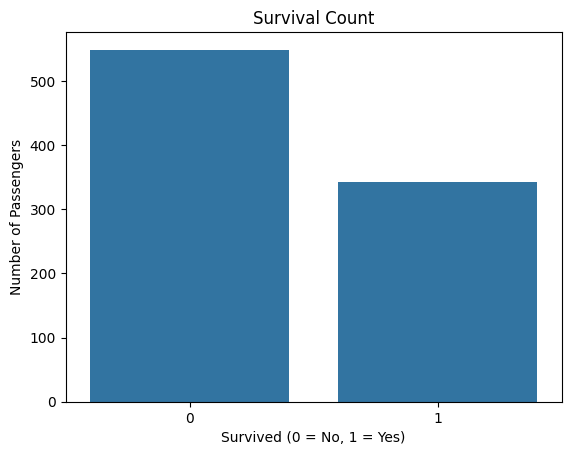

In [8]:
# Plot the count of passengers who survived vs. who did not
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()


Females had a much higher chance of survival than males.

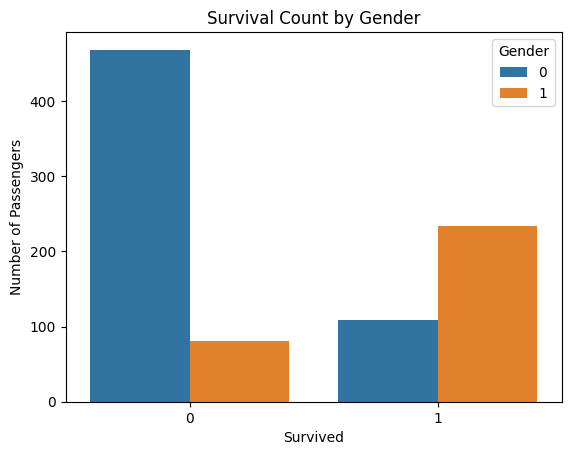

In [9]:
# Compare survival rates between males and females
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend(title='Gender')
plt.show()

# here blue = male and orangle = female


Higher-class passengers (1st class) had a better chance of survival.

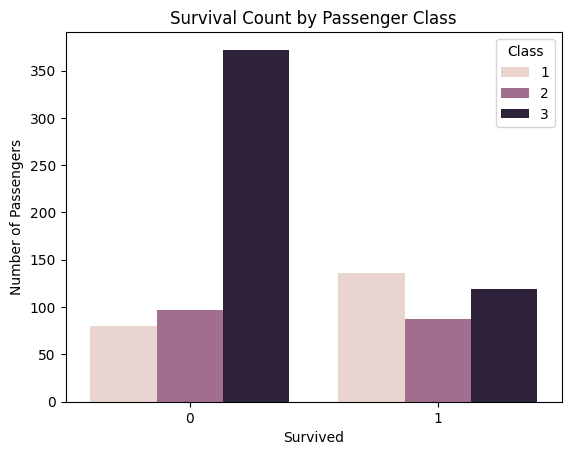

In [10]:
# Compare survival based on passenger class (Pclass: 1st, 2nd, 3rd)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend(title='Class')
plt.show()

Many children and young adults survived, especially compared to middle-aged men.

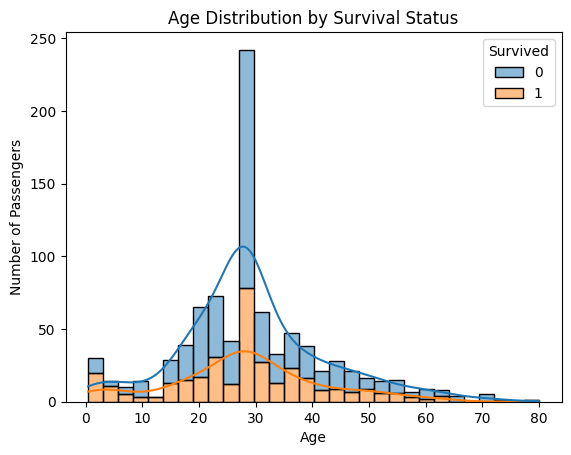

In [11]:
# Use histplot to compare age distributions
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

Most passengers embarked from port S, but survival rate might be higher from C

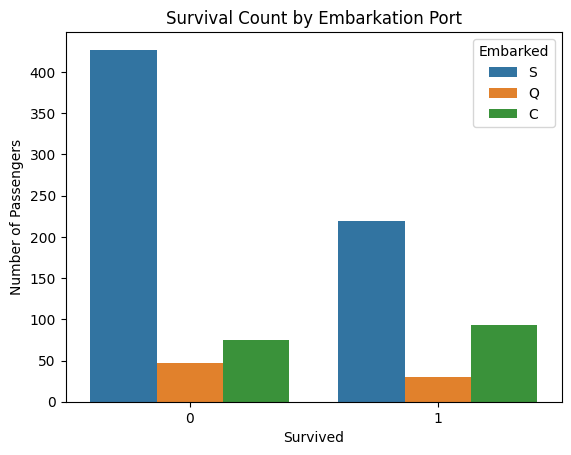

In [12]:
# Examine survival rates by port of embarkation
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend(title='Embarked')
plt.show()

# Feature Engineering

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [14]:
# Perform one-hot encoding on 'Embarked' column
# This creates separate columns for each embarkation port (C, Q, S)
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column since it's now encoded
df.drop('Embarked', axis=1, inplace=True)



In [15]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Count how many times each title appears in the dataset
title_counts = df['Title'].value_counts()

# Display the counts
print(title_counts)

# Standardize and group titles
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Capt': 'Rare',
    'Sir': 'Rare',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Don': 'Rare',
    'Jonkheer': 'Rare'
})

# now we only have 5 unique titles for each
df['Title'].unique()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

titles had higher survival rates :-  Miss, Mrs, Master

Survived    0    1
Title             
Master     17   23
Miss       55  130
Mr        436   81
Mrs        26  100
Rare       15    8


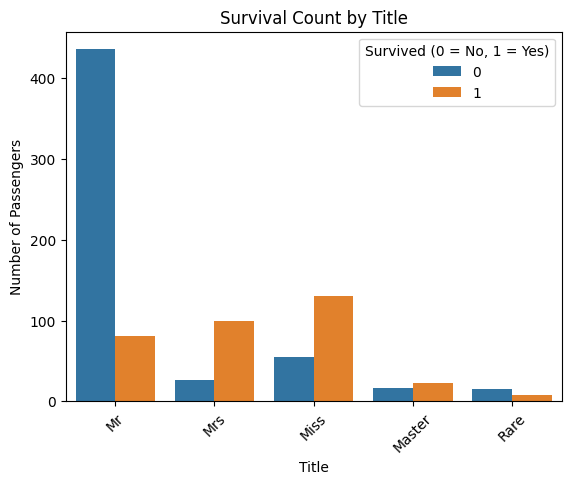

In [16]:
# lets see the survival count based on title

# Group by Title and Survived, then count how many passengers in each group
title_survival = df.groupby(['Title', 'Survived']).size().unstack()

# Display the result
print(title_survival)


# Plot survival count per title using hue
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival Count by Title')
plt.xlabel('Title')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survived (0 = No, 1 = Yes)')
plt.show()



In [17]:
title_dummies = pd.get_dummies(df['Title'], prefix='Title')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, title_dummies], axis=1)

# Drop the original 'Embarked' column since it's now encoded
df.drop('Title', axis=1, inplace=True)

# Convert all boolean (True/False) values in the DataFrame to 0/1
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

In [18]:
# Drop columns that won't help with modeling (e.g., Name, Ticket, PassengerId)
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0


Feature	Correlation with Survived	Meaning
1. Sex	Negative (e.g., -0.54)	Since male = 0 and female = 1, this means females were more likely to survive
2. Pclass	Negative (e.g., -0.34)	Lower class (3rd) passengers had lower survival rates
3. Age	Slightly negative	Younger passengers had a slightly higher chance of survival
4. SibSp	Varies	Having 1 sibling/spouse onboard could help survival
5. Embarked_C	Positive	Passengers who boarded at Cherbourg had better survival chances

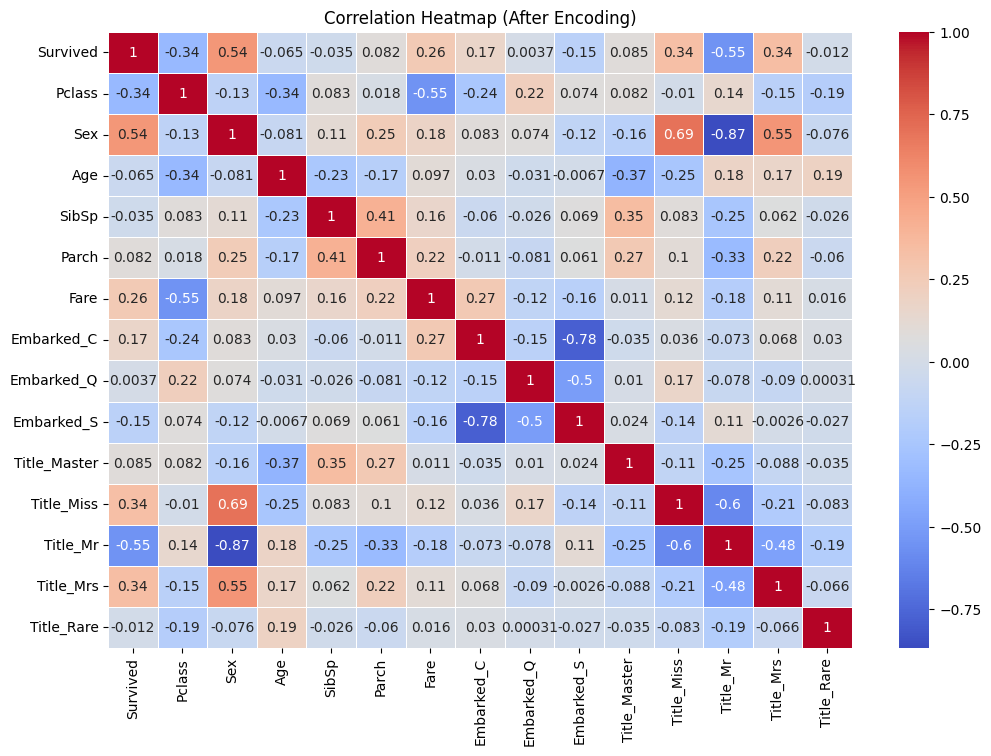

In [19]:
# Select numeric columns only (after encoding categorical ones)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix for numeric features
corr_matrix = numeric_df.corr()

# Set plot size for readability
plt.figure(figsize=(12, 8))

# Plot the correlation heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (After Encoding)')
plt.show()

# Model Training With XGBoost

In [20]:
# Import the XGBoost library, which is an efficient implementation of gradient boosting
import xgboost as xgb

# Import GridSearchCV to perform hyperparameter tuning using cross-validation
from sklearn.model_selection import GridSearchCV

# Import metrics for evaluating the performance of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Drop columns not used in training (you can adjust based on your setup)
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [22]:
# Split the dataset into training and testing sets
# X: feature set, y: target variable
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
# stratify=y ensures the target variable is evenly distributed in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Display all columns in X that have object (non-numeric) data types, typically indicating categorical features that may need encoding
X.dtypes[X.dtypes == 'object']


,0


In [24]:
param_grid = {
    # Number of gradient boosted trees. Equivalent to number of boosting rounds.
    'n_estimators': [100, 200],

    # Maximum depth of a tree. Increasing depth can lead to overfitting.
    'max_depth': [3, 5, 7],

    # Step size shrinkage used in update to prevents overfitting.
    'learning_rate': [0.01, 0.1, 0.2],

    # Subsample ratio of the training instance. Prevents overfitting by sampling.
    'subsample': [0.8, 1],

    # Subsample ratio of columns when constructing each tree.
    'colsample_bytree': [0.8, 1]
}

In [25]:
xgb_clf = xgb.XGBClassifier(
    # Specifies the learning task and corresponding objective function.
    objective='binary:logistic', # 'binary:logistic' is used for binary classification problems.
    eval_metric='logloss',  # Evaluation metric used for validation data; 'logloss' is commonly used for classification.
    use_label_encoder=False,  # Disables the use of label encoder internally (recommended for recent versions of scikit-learn).
    random_state=42  # Ensures reproducibility of results.
)



In [26]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0


In [27]:
# Perform grid search to find the best hyperparameters for the XGBoost model
grid_search = GridSearchCV(
    estimator=xgb_clf,        # Base estimator (XGBoost classifier)
    param_grid=param_grid,    # Dictionary with parameters to try
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Metric used to evaluate model performance
    verbose=1,                # Controls the verbosity: 1 shows progress
    n_jobs=-1                 # Use all available cores for parallel processing
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:01:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [28]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[98 12]
 [22 47]]


# Model Training using Random Foreest

In [29]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


In [30]:

# Define the Random Forest model

rf_model = RandomForestClassifier(random_state=42)

# Create a hyperparameter grid

param_grid = {
    'n_estimators': [100, 200],             # number of trees
    'max_depth': [4, 6, 8, None],           # max depth of each tree
    'min_samples_split': [2, 5],            # minimum samples required to split
    'min_samples_leaf': [1, 2],             # minimum samples at each leaf node
    'bootstrap': [True, False]              # bootstrap sampling
}



In [31]:

# Perform GridSearch with 5-fold CV

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X, y)

# Output best parameters

print("Best Parameters from GridSearch:")
print(grid_search.best_params_)

# Evaluate the best model using cross-validation

best_rf = grid_search.best_estimator_



Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters from GridSearch:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))


Cross-Validation Accuracy Scores: [0.83240223 0.80337079 0.87640449 0.80898876 0.86516854]
Average CV Accuracy: 83.73%


# Preparing The Submission

In [33]:
# Load the test data
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [35]:
# Fill missing values
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})


/tmp/ipython-input-35-2032992619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
/tmp/ipython-input-35-2032992619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [36]:
# Extract title from name
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to 'Rare'
test_df['Title'] = test_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [37]:
# One-hot encode Title
title_dummies = pd.get_dummies(test_df['Title'], prefix='Title')
test_df = pd.concat([test_df, title_dummies], axis=1)
test_df.drop(['Name', 'Title', 'Ticket', 'Cabin'], axis=1, inplace=True)

# One-hot encode 'Embarked' safely
test_df['Embarked'].fillna('S', inplace=True)
embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
test_df = pd.concat([test_df, embarked_dummies], axis=1)
test_df.drop('Embarked', axis=1, inplace=True)

# Convert all boolean (True/False) values in the DataFrame to 0/1
test_df = test_df.astype({col: 'int' for col in test_df.select_dtypes(include='bool').columns})

/tmp/ipython-input-37-56110649.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna('S', inplace=True)


In [38]:
test_df.head()


# extracting passenger id because we need it in submission file
passenger_ids = test_df['PassengerId']
# dropping all the columns that are not in out test dataset
test_df.drop(columns=['PassengerId'], inplace=True)
print(passenger_ids)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0


In [40]:
# ensuring all the columns are numeric in the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          418 non-null    float64
 6   Title_Master  418 non-null    int64  
 7   Title_Miss    418 non-null    int64  
 8   Title_Mr      418 non-null    int64  
 9   Title_Mrs     418 non-null    int64  
 10  Title_Rare    418 non-null    int64  
 11  Embarked_C    418 non-null    int64  
 12  Embarked_Q    418 non-null    int64  
 13  Embarked_S    418 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 45.8 KB


In [41]:
# Align test set columns to match training data's features
test_df_aligned = test_df.reindex(columns=X.columns, fill_value=0)

# Make predictions on the test dataset
predictions = best_rf.predict(test_df_aligned)

# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions.astype(int)
})

# Save to CSV in Kaggle's required format
submission.to_csv('submission.csv', index=False)

print("✅ submission.csv file created successfully!")

✅ submission.csv file created successfully!
